In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
from pathlib import Path
csvpath = Path('./Resources/GGHC_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Market Return,Portfolio Return
Date,,
2018-07-02,1.002766,1.004940
2018-07-03,0.998673,0.998465
2018-07-05,1.007006,1.008567
2018-07-06,1.015414,1.019668
2018-07-09,1.024706,1.028022


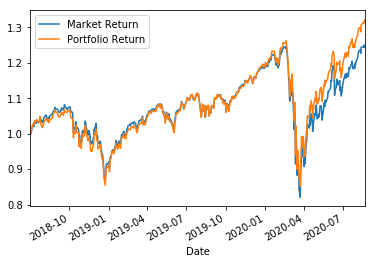

In [31]:
df.plot()

## Linear Regression Model with a single-training-window 

In [32]:
df["Lagged_Return"] = df["Portfolio Return"].shift()
df = df.dropna()
df.head()

,Market Return,Portfolio Return,Lagged_Return
Date,,,
2018-07-03,0.998673,0.998465,1.004940
2018-07-05,1.007006,1.008567,0.998465
2018-07-06,1.015414,1.019668,1.008567
2018-07-09,1.024706,1.028022,1.019668
2018-07-10,1.028135,1.030217,1.028022


In [33]:
training_window = 30
timeframe = len(df.index) - training_window - 1
print(timeframe)

506


In [34]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [35]:
# During rolling iteration, split into train and test sets.
# Use linear regression to predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = df.index[i]
    
    # End of training window
    end_of_training_period = df.index[training_window+i]

    # Window of test-window data
    test_day = df.index[training_window + i + 1]
    
    # String of testing window
    start_of_test_day  = test_day
    end_of_test_day = test_day
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_day:end_of_test_day]
    
    
    
    # Create new dataframes:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Portfolio Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Portfolio Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Portfolio Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   

In [36]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.tail()

,Actual Returns,Portfolio Predictions,Predictions
2020-08-17,1.312923,1.305911,NaN
2020-08-18,1.316739,1.313266,NaN
2020-08-19,1.312691,1.317753,NaN
2020-08-20,1.317734,1.313118,NaN
2020-08-21,1.322819,1.319472,NaN


In [37]:
# X_test Data
split = int(0.25*timeframe)
results_test = Results.iloc[-split:]
results_test

,Actual Returns,Portfolio Predictions,Predictions
2020-02-21,1.240533,1.254301,NaN
2020-02-24,1.198413,1.240071,NaN
2020-02-25,1.162607,1.203998,NaN
2020-02-26,1.159963,1.165737,NaN
2020-02-27,1.110559,1.161794,NaN
2020-02-28,1.106007,1.092253,NaN
2020-03-02,1.154014,1.092848,NaN
2020-03-03,1.120106,1.156361,NaN
2020-03-04,1.168969,1.118740,NaN
2020-03-05,1.130640,1.171528,NaN


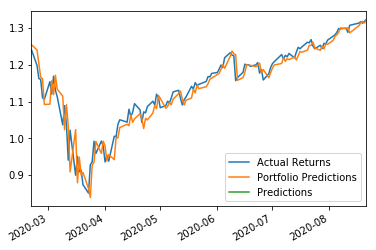

In [38]:
# Plot the results
results_test.plot()

## Same process with Market Return

In [39]:
df["Lagged Market Return"] = df["Market Return"].shift()
df = df.dropna()
df.head()

,Market Return,Portfolio Return,Lagged_Return,Lagged Market Return
Date,,,,
2018-07-05,1.007006,1.008567,0.998465,0.998673
2018-07-06,1.015414,1.019668,1.008567,1.007006
2018-07-09,1.024706,1.028022,1.019668,1.015414
2018-07-10,1.028135,1.030217,1.028022,1.024706
2018-07-11,1.021092,1.025594,1.030217,1.028135


In [40]:
training_window = 30
timeframe = len(df.index) - training_window-1
print(timeframe)

505


In [41]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
market_predictions = pd.DataFrame(columns=["Market Predictions"])
market_actuals = pd.DataFrame(columns=["Actual Market Returns"])

In [42]:
# During rolling iteration, split into train and test sets.
# Use linear regression to predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = df.index[i]
    
    # End of training window
    end_of_training_period = df.index[training_window+i]

    # Window of test-window data
    test_day = df.index[training_window + i + 1]
    
    # String of testing window
    start_of_test_day  = test_day
    end_of_test_day = test_day
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_day:end_of_test_day]
    
    
    
    # Create new dataframes:
    X_train = train["Lagged Market Return"].to_frame()
    y_train = train["Market Return"]
    X_test = test["Lagged Market Return"].to_frame()
    y_test = test["Market Return"]

    model_1 = LinearRegression()
    model_1.fit(X_train, y_train)
    predictions = model_1.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Market Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Market Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    market_predictions = market_predictions.append(predictions)
    market_actuals = market_actuals.append(actuals)   

In [43]:
Results_market = pd.concat([market_actuals, market_predictions], axis=1)
Results_market.tail()

,Actual Market Returns,Market Predictions
2020-08-17,1.245916,1.243781
2020-08-18,1.248645,1.246461
2020-08-19,1.243482,1.249465
2020-08-20,1.247281,1.243797
2020-08-21,1.251669,1.248557


In [44]:
# X_test Data
split = int(0.25*timeframe)
results_market = Results_market.iloc[-split:]
results_market

,Actual Market Returns,Market Predictions
2020-02-21,1.229728,1.241188
2020-02-24,1.188871,1.229128
2020-02-25,1.153066,1.195031
2020-02-26,1.148826,1.155633
2020-02-27,1.097201,1.149463
2020-02-28,1.092076,1.073276
2020-03-02,1.139718,1.076025
2020-03-03,1.107489,1.141614
2020-03-04,1.153840,1.105435
2020-03-05,1.115270,1.156268


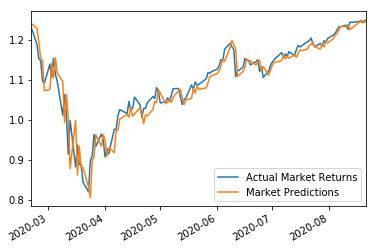

In [45]:
# Plot the results
results_market.plot()

In [46]:
agg_result = pd.concat([results_market, results_test], axis=1)
agg_result.head()

,Actual Market Returns,Market Predictions,Actual Returns,Portfolio Predictions,Predictions
2020-02-21,1.229728,1.241188,1.240533,1.254301,NaN
2020-02-24,1.188871,1.229128,1.198413,1.240071,NaN
2020-02-25,1.153066,1.195031,1.162607,1.203998,NaN
2020-02-26,1.148826,1.155633,1.159963,1.165737,NaN
2020-02-27,1.097201,1.149463,1.110559,1.161794,NaN


In [48]:
import matplotlib.pyplot as plt
import hvplot.pandas
agg_result.hvplot(width=900, height=500, legend='bottom_right').opts(title="Portfolio Returns vs. Market Return: GGHC")

:NdOverlay   [Variable]
   :Curve   [index]   (value)